# **Task 2: Predict Future Stock Prices (Short-Term) **

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
stock = ("AAPL")

In [ ]:
data = yf.download(stock, start="2015-01-01", end="2024-12-31")

/tmp/ipython-input-1151193405.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data)

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-01-02   24.237553   24.705322   23.798602   24.694237  212818400
2015-01-05   23.554743   24.086803   23.368523   24.006994  257142000
2015-01-06   23.556955   23.816334   23.195597   23.619029  263188400
2015-01-07   23.887276   23.987036   23.654499   23.765345  160423600
2015-01-08   24.805082   24.862723   24.097885   24.215383  237458000
...                ...         ...         ...         ...        ...
2024-12-23  254.120697  254.498976  252.308884  253.622948   40858800
2024-12-24  257.037476  257.047410  254.140559  254.339671   23234700
2024-12-26  257.853760  258.928914  256.470034  257.027510   27237100
2024-12-27  254.439224  257.535238  251.920617  256.669129   42355300
2024-12-30  251.064499  252.358649  249.621030  251.094363   35557500

[2515 rows x 5 colu

In [ ]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.237553  24.705322  23.798602  24.694237  212818400
2015-01-05  23.554743  24.086803  23.368523  24.006994  257142000
2015-01-06  23.556955  23.816334  23.195597  23.619029  263188400
2015-01-07  23.887276  23.987036  23.654499  23.765345  160423600
2015-01-08  24.805082  24.862723  24.097885  24.215383  237458000


In [ ]:
X = data.drop("Close", axis=1)

In [ ]:
print(X.head())

Price            High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL
Date                                                  
2015-01-02  24.705322  23.798602  24.694237  212818400
2015-01-05  24.086803  23.368523  24.006994  257142000
2015-01-06  23.816334  23.195597  23.619029  263188400
2015-01-07  23.987036  23.654499  23.765345  160423600
2015-01-08  24.862723  24.097885  24.215383  237458000


In [ ]:
y = data["Close"]

In [ ]:
print(y.head())

Ticker           AAPL
Date                 
2015-01-02  24.237553
2015-01-05  23.554743
2015-01-06  23.556955
2015-01-07  23.887276
2015-01-08  24.805082


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9583548084379446


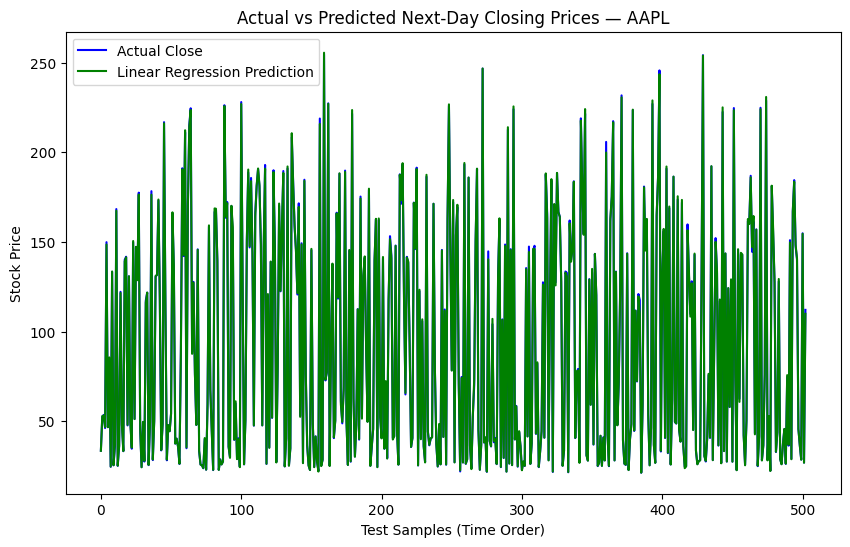

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plot actual closing prices
plt.plot(y_test.values, label='Actual Close', color='blue')

# Plot Linear Regression predictions
plt.plot(y_pred, label='Linear Regression Prediction', color='green')

# Add title and labels
plt.title('Actual vs Predicted Next-Day Closing Prices — AAPL')
plt.xlabel('Test Samples (Time Order)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()